In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/patoram123/Proyecto_Visualizacion/main/datasets/public_bikes_2018/seul/SeoulBikeData.csv'
                ,encoding='unicode escape')

In [40]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [41]:
df = df.groupby('Date', as_index=False).agg({'Rented Bike Count':'sum', 'Hour':'mean', 'Temperature(°C)':'mean',
                                        'Humidity(%)':'mean', 'Wind speed (m/s)':'mean', 
                                        'Visibility (10m)':'mean', 'Dew point temperature(°C)':'mean',
                                        'Solar Radiation (MJ/m2)':'mean', 'Rainfall(mm)':'mean', 
                                        'Snowfall (cm)':'mean'})

In [42]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,01/01/2018,4290,11.5,-1.283333,39.333333,1.454167,1894.833333,-13.866667,0.255833,0.000000,0.000000
1,01/02/2018,5377,11.5,-3.866667,44.000000,1.608333,1923.625000,-15.012500,0.337083,0.000000,0.904167
2,01/03/2018,5132,11.5,0.450000,64.208333,3.554167,1084.000000,-6.387500,0.747500,0.104167,0.000000
3,01/04/2018,17388,11.5,15.183333,68.916667,1.570833,831.833333,9.370833,0.302083,0.000000,0.000000
4,01/05/2018,26820,11.5,20.341667,72.791667,1.437500,456.458333,15.120833,0.517500,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
360,31/05/2018,31681,11.5,20.525000,61.208333,1.941667,1246.208333,11.491667,1.122500,0.000000,0.000000
361,31/07/2018,22897,11.5,32.525000,49.625000,1.383333,1993.791667,20.216667,1.020833,0.000000,0.000000
362,31/08/2018,27817,11.5,25.558333,67.166667,1.600000,1609.000000,18.491667,0.923750,0.004167,0.000000
363,31/10/2018,21545,11.5,7.529167,55.000000,1.666667,1960.916667,-1.408333,0.604583,0.000000,0.000000


In [43]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [44]:
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,NaN,0.699824,0.028158,-0.174859,0.145376,0.602648,0.684069,-0.214252,-0.240836
Hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature(°C),0.699824,NaN,1.000000,0.401461,-0.258956,0.010578,0.962614,0.543482,0.139812,-0.267951
Humidity(%),0.028158,NaN,0.401461,1.000000,-0.224168,-0.556480,0.630265,-0.273534,0.528241,0.064247
Wind speed (m/s),-0.174859,NaN,-0.258956,-0.224168,1.000000,0.190390,-0.284104,0.107689,-0.081074,0.020792
Visibility (10m),0.145376,NaN,0.010578,-0.556480,0.190390,1.000000,-0.145833,0.264634,-0.218284,-0.101296
Dew point temperature(°C),0.602648,NaN,0.962614,0.630265,-0.284104,-0.145833,1.000000,0.377497,0.260644,-0.210823
Solar Radiation (MJ/m2),0.684069,NaN,0.543482,-0.273534,0.107689,0.264634,0.377497,1.000000,-0.323231,-0.231491
Rainfall(mm),-0.214252,NaN,0.139812,0.528241,-0.081074,-0.218284,0.260644,-0.323231,1.000000,-0.022493
Snowfall (cm),-0.240836,NaN,-0.267951,0.064247,0.020792,-0.101296,-0.210823,-0.231491,-0.022493,1.000000


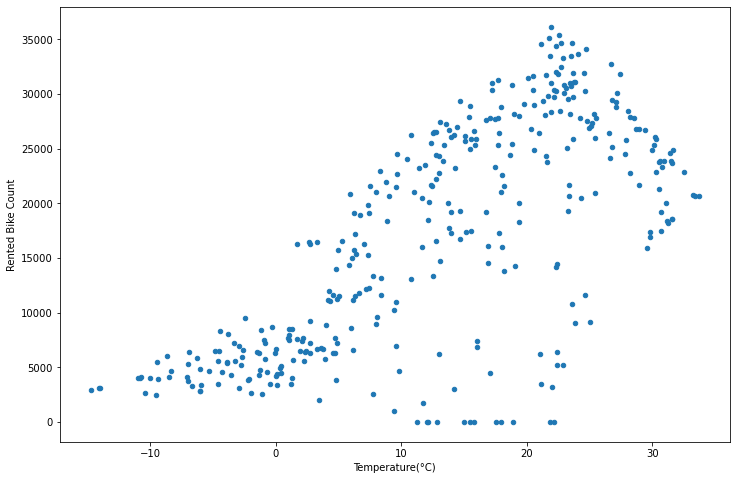

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
df.plot(x='Temperature(°C)', y='Rented Bike Count', kind='scatter', ax=ax)
plt.show()

In [46]:
from scipy.stats import pearsonr

# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df['Temperature(°C)'], y =  df['Rented Bike Count'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6998242263292067
P-value:  5.4635482267476766e-55


In [47]:
# División de los datos en train y test
# ==============================================================================
X = df[['Temperature(°C)']]
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [48]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)#prepend constante primera columna

modelo = sm.OLS(endog=y_train, exog=X_train,)

modelo = modelo.fit()#cov_type='HC3'

In [49]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     246.9
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           1.13e-40
Time:                        23:38:54   Log-Likelihood:                -3019.5
No. Observations:                 292   AIC:                             6043.
Df Residuals:                     290   BIC:                             6050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8829.1198    673.346     13.112      0.0

In [50]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16943.231283,440.057359,16077.120117,17809.342449,2119.517201,31766.945365
1,17410.955541,441.516099,16541.973314,18279.937769,2587.073433,32234.837650
2,17927.777926,445.441914,17051.068997,18804.486856,3103.440869,32752.114984
3,7472.461081,740.856043,6014.324593,8930.597569,-7397.593144,22342.515306


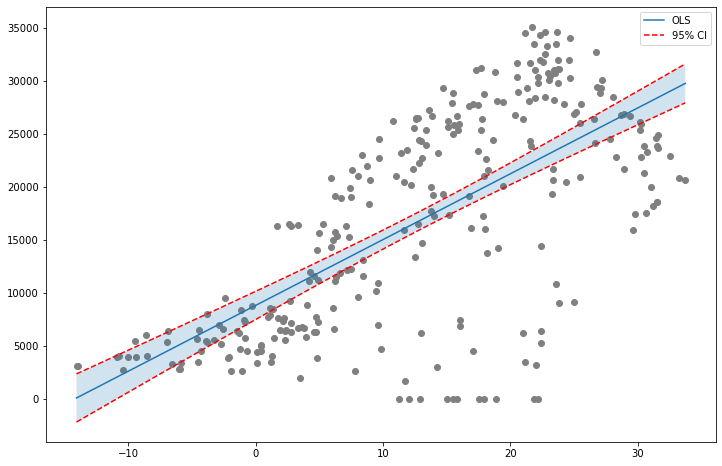

In [51]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.2)
ax.legend();

In [52]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)


rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )


print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 6573.847271839859
